In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#  Step 01 : Undurstanding the Business Problem

- Data set contain avg. values of electrical parameter. From the dataset need to calculate accurate power factor of the electrical utility.
- In electrical sector power factor is most important things becaused it reflact the electrical enery losses in the reactive power.
- Good Power factor means PF ==1 --->. System takes less reactive power mean Q ==0
- Poor Power factor means PF < 1 --->. System takes more reactive power mean Q >0

#  Step 01 : Undurstanding the Dataset Parameter

- There are many columns which are no need
- Delet the columns which are not need and select only RMS values
- This dataset is too large hence we will delet min and max and select only avg values

In [2]:
df = pd.read_csv('/content/drive/MyDrive/01 Data Science with Python ML deep learning/ML/Project 03 : Electrical PF LR/Electrical_data.CSV - 07130000.CSV.csv')
df.head()

,Date,Etime,Status,Freq_Avg[Hz],U1_Avg[V],Ufnd1_Avg[V],Udeg1_Avg[deg],U2_Avg[V],Ufnd2_Avg[V],Udeg2_Avg[deg],...,WP+dem[Wh],WP-dem[Wh],WQLAGdem[varh],WQLEADdem[varh],Pdem+[W],Pdem-[W],QdemLAG[var],QdemLEAD[var],PFdem,Pulse
0,13/07/2023 15:49:50,0.0,0.0,50.02,"10,857.00","6,296.00",0.0,"10,876.00","6,153.00",-121.34,...,"80,000.00",0.0,"13,000.00",0.0,"9,620,000.00",0.0,"1,540,000.00",0.00,0.99,0.0
1,13/07/2023 15:50:20,0.0,0.0,49.99,"10,854.00","6,294.00",0.0,"10,879.00","6,155.00",-121.30,...,"79,000.00",0.0,"13,000.00",0.0,"9,520,000.00",0.0,"1,500,000.00",0.00,0.99,0.0
2,13/07/2023 15:50:50,0.0,0.0,49.97,"10,838.00","6,282.00",0.0,"10,858.00","6,145.00",-121.34,...,"79,000.00",0.0,"12,000.00",0.0,"9,530,000.00",0.0,"1,490,000.00",0.00,0.99,0.0
3,13/07/2023 15:51:20,0.0,0.0,49.97,"10,921.00","6,331.00",0.0,"10,940.00","6,191.00",-121.33,...,"69,000.00",0.0,"8,000.00",0.0,"8,230,000.00",0.0,"990,000.00",0.00,0.99,0.0
4,13/07/2023 15:51:50,0.0,0.0,49.97,"10,934.00","6,341.00",0.0,"10,952.00","6,197.00",-121.33,...,"69,000.00",0.0,"8,000.00",0.0,"8,240,000.00",0.0,"1,000,000.00",0.00,0.99,0.0


In [3]:
# Extracting all columns of dataset and select base on the condition we are calculating base on RMS values only

col = []
for i in df.columns:
  if len(i)<12:
    col.append(i)
    #print(i)
ele=df[col]
ele.head(2)

,Date,Etime,Status,U1_Avg[V],U2_Avg[V],U3_Avg[V],I1_Avg[A],I2_Avg[A],I3_Avg[A],P1_Avg[W],...,WP+[Wh],WP-[Wh],WQLAG[varh],Ecost,WP+dem[Wh],WP-dem[Wh],Pdem+[W],Pdem-[W],PFdem,Pulse
0,13/07/2023 15:49:50,0.0,0.0,"10,857.00","10,876.00","10,855.00",520.5,519.5,514.0,"3,228,000.00",...,"80,000.00",0.0,"13,000.00",0.0,"80,000.00",0.0,"9,620,000.00",0.0,0.99,0.0
1,13/07/2023 15:50:20,0.0,0.0,"10,854.00","10,879.00","10,853.00",514.4,514.9,508.3,"3,191,000.00",...,"160,000.00",0.0,"25,000.00",0.0,"79,000.00",0.0,"9,520,000.00",0.0,0.99,0.0


In [4]:
# drop some columns which are not used
col_ignore = ['WP+[Wh]','WP-[Wh]','WQLAG[varh]','Ecost','WP+dem[Wh]','WP-dem[Wh]','Pdem+[W]','Pdem-[W]','PFdem','Pulse']
ele.drop(columns=col_ignore,axis=1,inplace=True)

In [5]:
#this dataset looks many output variable as power factor such as avg, min and max pf
#for further study we will take only avg values and its sum
ele.columns

Index(['Date', 'Etime', 'Status', 'U1_Avg[V]', 'U2_Avg[V]', 'U3_Avg[V]',
       'I1_Avg[A]', 'I2_Avg[A]', 'I3_Avg[A]', 'P1_Avg[W]', 'P2_Avg[W]',
       'P3_Avg[W]', 'P_Avg[W]', 'S1_Avg[VA]', 'S2_Avg[VA]', 'S3_Avg[VA]',
       'S_Avg[VA]', 'Q1_Avg[var]', 'Q2_Avg[var]', 'Q3_Avg[var]', 'Q_Avg[var]',
       'PF1_Avg', 'PF2_Avg', 'PF3_Avg', 'PF_Avg', 'U1_Max[V]', 'U2_Max[V]',
       'U3_Max[V]', 'I1_Max[A]', 'I2_Max[A]', 'I3_Max[A]', 'P1_Max[W]',
       'P2_Max[W]', 'P3_Max[W]', 'P_Max[W]', 'S1_Max[VA]', 'S2_Max[VA]',
       'S3_Max[VA]', 'S_Max[VA]', 'Q1_Max[var]', 'Q2_Max[var]', 'Q3_Max[var]',
       'Q_Max[var]', 'PF1_Max', 'PF2_Max', 'PF3_Max', 'PF_Max', 'U1_Min[V]',
       'U2_Min[V]', 'U3_Min[V]', 'I1_Min[A]', 'I2_Min[A]', 'I3_Min[A]',
       'P1_Min[W]', 'P2_Min[W]', 'P3_Min[W]', 'P_Min[W]', 'S1_Min[VA]',
       'S2_Min[VA]', 'S3_Min[VA]', 'S_Min[VA]', 'Q1_Min[var]', 'Q2_Min[var]',
       'Q3_Min[var]', 'Q_Min[var]', 'PF1_Min', 'PF2_Min', 'PF3_Min', 'PF_Min'],
      dtype='object')

In [6]:
selected_avg_col=['Date', 'Etime','U1_Avg[V]', 'U2_Avg[V]', 'U3_Avg[V]',
       'I1_Avg[A]', 'I2_Avg[A]', 'I3_Avg[A]', 'P1_Avg[W]', 'P2_Avg[W]',
       'P3_Avg[W]', 'P_Avg[W]', 'S1_Avg[VA]', 'S2_Avg[VA]', 'S3_Avg[VA]',
       'S_Avg[VA]', 'Q1_Avg[var]', 'Q2_Avg[var]', 'Q3_Avg[var]', 'Q_Avg[var]',
        'PF_Avg']
avg_ele=ele[selected_avg_col]
avg_ele.head(2)

,Date,Etime,U1_Avg[V],U2_Avg[V],U3_Avg[V],I1_Avg[A],I2_Avg[A],I3_Avg[A],P1_Avg[W],P2_Avg[W],...,P_Avg[W],S1_Avg[VA],S2_Avg[VA],S3_Avg[VA],S_Avg[VA],Q1_Avg[var],Q2_Avg[var],Q3_Avg[var],Q_Avg[var],PF_Avg
0,13/07/2023 15:49:50,0.0,"10,857.00","10,876.00","10,855.00",520.5,519.5,514.0,"3,228,000.00","3,156,000.00",...,"9,620,000.00","3,278,000.00","3,198,000.00","3,270,000.00","9,750,000.00","572,000.00","512,000.00","452,000.00","1,540,000.00",0.99
1,13/07/2023 15:50:20,0.0,"10,854.00","10,879.00","10,853.00",514.4,514.9,508.3,"3,191,000.00","3,129,000.00",...,"9,520,000.00","3,239,000.00","3,170,000.00","3,234,000.00","9,640,000.00","552,000.00","500,000.00","443,000.00","1,500,000.00",0.99


# Data Cleaning

In [7]:
# its observed many columns which are int, date, time and float data are object
df1=avg_ele
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         151 non-null    object 
 1   Etime        151 non-null    float64
 2   U1_Avg[V]    151 non-null    object 
 3   U2_Avg[V]    151 non-null    object 
 4   U3_Avg[V]    151 non-null    object 
 5   I1_Avg[A]    151 non-null    float64
 6   I2_Avg[A]    151 non-null    float64
 7   I3_Avg[A]    151 non-null    float64
 8   P1_Avg[W]    151 non-null    object 
 9   P2_Avg[W]    151 non-null    object 
 10  P3_Avg[W]    151 non-null    object 
 11  P_Avg[W]     151 non-null    object 
 12  S1_Avg[VA]   151 non-null    object 
 13  S2_Avg[VA]   151 non-null    object 
 14  S3_Avg[VA]   151 non-null    object 
 15  S_Avg[VA]    151 non-null    object 
 16  Q1_Avg[var]  151 non-null    object 
 17  Q2_Avg[var]  151 non-null    object 
 18  Q3_Avg[var]  151 non-null    object 
 19  Q_Avg[va

In [8]:
df1['U1_Avg[V]'] = df1['U1_Avg[V]'].str.replace(',','').astype(float)
df1['U2_Avg[V]'] = df1['U2_Avg[V]'].str.replace(',','').astype(float)
df1['U3_Avg[V]'] = df1['U3_Avg[V]'].str.replace(',','').astype(float)
df1['P1_Avg[W]'] = df1['P1_Avg[W]'].str.replace(',','').astype(float)
df1['P2_Avg[W]'] = df1['P2_Avg[W]'].str.replace(',','').astype(float)
df1['P3_Avg[W]'] = df1['P3_Avg[W]'].str.replace(',','').astype(float)
df1['P_Avg[W]'] = df1['P_Avg[W]'].str.replace(',','').astype(float)
df1['S1_Avg[VA]'] = df1['S1_Avg[VA]'].str.replace(',','').astype(float)
df1['S2_Avg[VA]'] = df1['S2_Avg[VA]'].str.replace(',','').astype(float)
df1['S3_Avg[VA]'] = df1['S3_Avg[VA]'].str.replace(',','').astype(float)
df1['S_Avg[VA]'] = df1['S_Avg[VA]'].str.replace(',','').astype(float)
df1['Q1_Avg[var]'] = df1['Q1_Avg[var]'].str.replace(',','').astype(float)
df1['Q2_Avg[var]'] = df1['Q2_Avg[var]'].str.replace(',','').astype(float)
df1['Q3_Avg[var]'] = df1['Q3_Avg[var]'].str.replace(',','').astype(float)
df1['Q_Avg[var]'] = df1['Q_Avg[var]'].str.replace(',','').astype(float)

In [9]:
df1.head(2)

,Date,Etime,U1_Avg[V],U2_Avg[V],U3_Avg[V],I1_Avg[A],I2_Avg[A],I3_Avg[A],P1_Avg[W],P2_Avg[W],...,P_Avg[W],S1_Avg[VA],S2_Avg[VA],S3_Avg[VA],S_Avg[VA],Q1_Avg[var],Q2_Avg[var],Q3_Avg[var],Q_Avg[var],PF_Avg
0,13/07/2023 15:49:50,0.0,10857.0,10876.0,10855.0,520.5,519.5,514.0,3228000.0,3156000.0,...,9620000.0,3278000.0,3198000.0,3270000.0,9750000.0,572000.0,512000.0,452000.0,1540000.0,0.99
1,13/07/2023 15:50:20,0.0,10854.0,10879.0,10853.0,514.4,514.9,508.3,3191000.0,3129000.0,...,9520000.0,3239000.0,3170000.0,3234000.0,9640000.0,552000.0,500000.0,443000.0,1500000.0,0.99


Text(0, 0.5, 'C3_Min[V]')

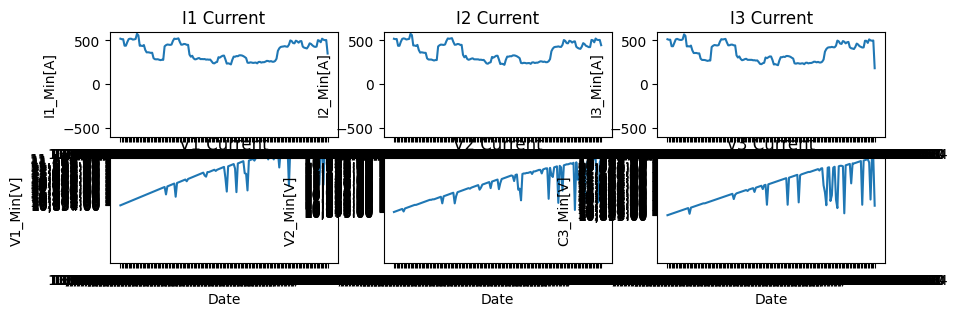

In [10]:
plt.figure(figsize=(10,3))
plt.subplot(2,3,1)
plt.plot(df['Date'], df['I1_Avg[A]'])
plt.ylim(-600, 600)
plt.title("I1 Current")
plt.xlabel('Date')
plt.ylabel('I1_Min[A]')

plt.subplot(2,3,2)
plt.plot(df['Date'], df['I2_Avg[A]'])
plt.ylim(-600, 600)
plt.title("I2 Current")
plt.xlabel('Date')
plt.ylabel('I2_Min[A]')

plt.subplot(2,3,3)
plt.plot(df['Date'], df['I3_Avg[A]'])
plt.ylim(-600, 600)
plt.title("I3 Current")
plt.xlabel('Date')
plt.ylabel('I3_Min[A]')

plt.subplot(2,3,4)
plt.plot(df['Date'], df['U1_Avg[V]'])
plt.title("V1 Current")
plt.ylim(-100, df['U1_Avg[V]'].max())
plt.xlabel('Date')
plt.ylabel('V1_Min[V]')

plt.subplot(2,3,5)
plt.plot(df['Date'], df['U2_Avg[V]'])
plt.ylim(-100, df['U1_Avg[V]'].max())
plt.title("V2 Current")
plt.xlabel('Date')
plt.ylabel('V2_Min[V]')

plt.subplot(2,3,6)
plt.plot(df['Date'], df['U3_Avg[V]'])
plt.ylim(-100, df['U1_Avg[V]'].max())
plt.title("v3 Current")
plt.xlabel('Date')
plt.ylabel('C3_Min[V]')

In [11]:
#its look this data has no missing values
df1.isnull().sum()
df1.describe()

,Etime,U1_Avg[V],U2_Avg[V],U3_Avg[V],I1_Avg[A],I2_Avg[A],I3_Avg[A],P1_Avg[W],P2_Avg[W],P3_Avg[W],P_Avg[W],S1_Avg[VA],S2_Avg[VA],S3_Avg[VA],S_Avg[VA],Q1_Avg[var],Q2_Avg[var],Q3_Avg[var],Q_Avg[var],PF_Avg
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,1.510000e+02,1.510000e+02,1.510000e+02,1.510000e+02,1.510000e+02,1.510000e+02,1.510000e+02,1.510000e+02,151.000000,151.000000,151.000000,1.510000e+02,151.000000
mean,0.026358,11030.132450,11043.854305,11026.092715,374.280795,373.239073,365.798013,2.358152e+06,2.303636e+06,2.333490e+06,6.995364e+06,2.389868e+06,2.332967e+06,2.354550e+06,7.076954e+06,376430.463576,358523.178808,296529.801325,1.039735e+06,0.989007
std,0.015641,89.818979,84.589944,88.912193,99.596387,101.651198,101.805044,6.036920e+05,6.060834e+05,6.292588e+05,1.831811e+06,6.185874e+05,6.184841e+05,6.401894e+05,1.870024e+06,150488.161658,135369.313826,139149.454805,4.251775e+05,0.005508
min,0.000000,10802.000000,10827.000000,10800.000000,226.400000,221.800000,182.900000,1.445000e+06,1.383000e+06,1.126000e+06,4.230000e+06,1.461000e+06,1.401000e+06,1.175000e+06,4.270000e+06,134000.000000,143000.000000,74000.000000,3.600000e+05,0.970000
25%,0.010000,10976.500000,10996.500000,10976.000000,282.100000,279.050000,272.950000,1.800000e+06,1.742000e+06,1.765500e+06,5.315000e+06,1.815500e+06,1.756500e+06,1.774000e+06,5.350000e+06,232500.000000,231000.000000,164500.000000,6.300000e+05,0.990000
50%,0.030000,11034.000000,11045.000000,11026.000000,362.400000,362.300000,356.500000,2.282000e+06,2.231000e+06,2.277000e+06,6.790000e+06,2.316000e+06,2.260000e+06,2.295000e+06,6.870000e+06,380000.000000,359000.000000,298000.000000,1.050000e+06,0.990000
75%,0.040000,11097.000000,11108.500000,11093.000000,456.150000,456.100000,449.950000,2.869000e+06,2.811000e+06,2.870000e+06,8.545000e+06,2.905500e+06,2.843000e+06,2.893000e+06,8.635000e+06,487500.000000,469500.000000,396500.000000,1.350000e+06,0.990000
max,0.050000,11182.000000,11181.000000,11178.000000,576.500000,576.200000,569.900000,3.550000e+06,3.479000e+06,3.569000e+06,1.060000e+07,3.614000e+06,3.533000e+06,3.612000e+06,1.076000e+07,722000.000000,670000.000000,617000.000000,2.010000e+06,1.000000


<Axes: >

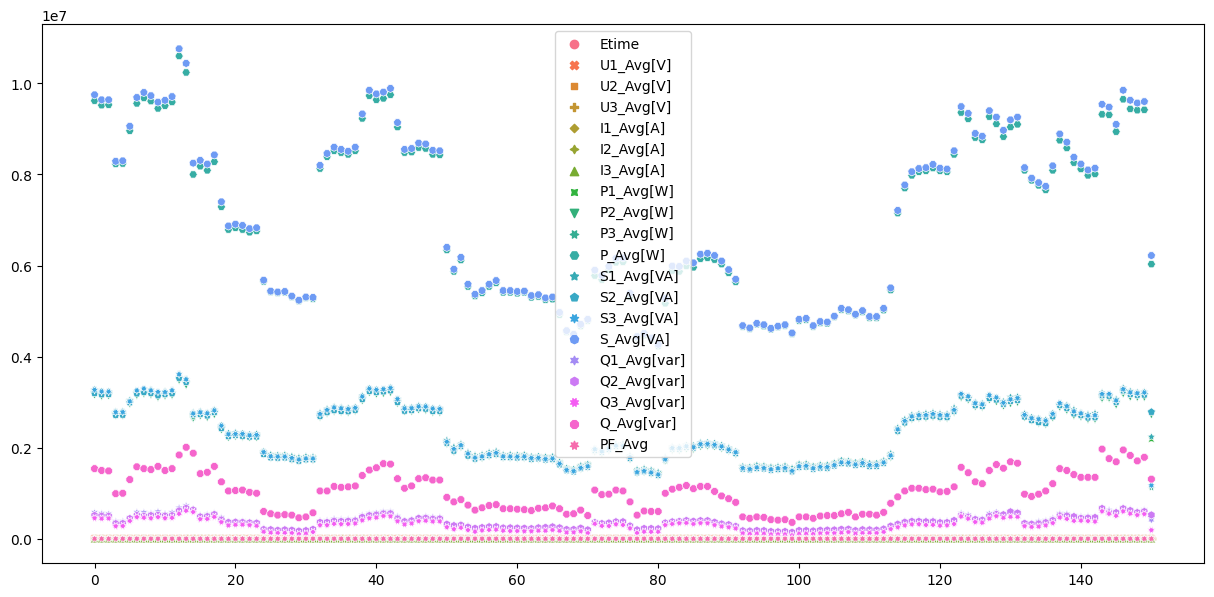

In [12]:
plt.figure(figsize=(15,7))
sns.scatterplot(df1)

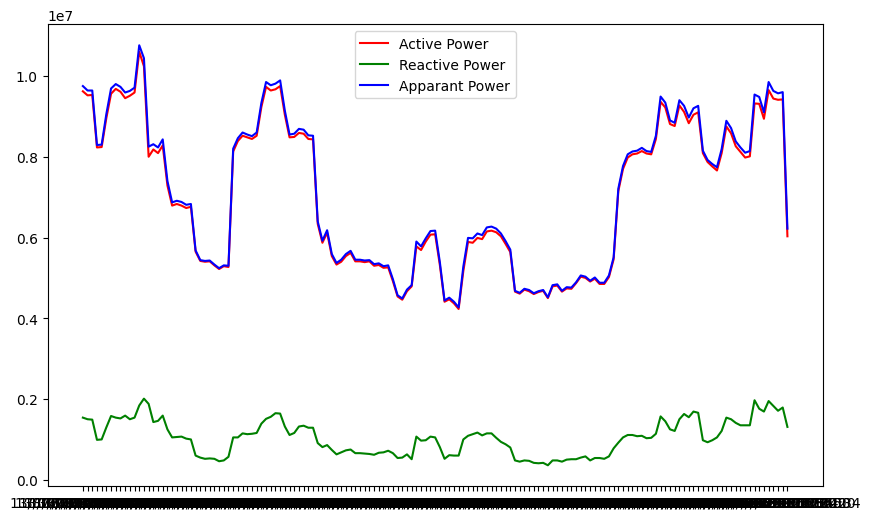

In [13]:
#all power relation with healp of plot

plt.figure(figsize=(10,6))

plt.plot(df1['Date'], df1['P_Avg[W]'], 'r',label='Active Power')
plt.plot(df1['Date'], df1['Q_Avg[var]'],'g',label='Reactive Power')
plt.plot(df1['Date'], df1['S_Avg[VA]'], 'b',label='Apparant Power')
plt.legend()

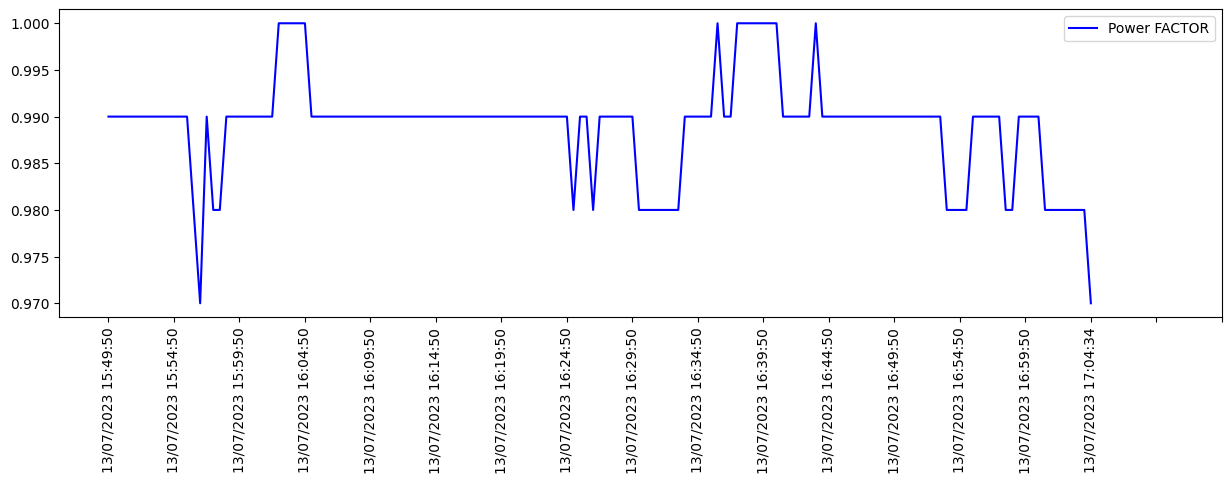

In [26]:
plt.figure(figsize=(15,4))

plt.plot(df1['Date'], df1['PF_Avg'], 'b',label='Power FACTOR')
plt.xticks(np.arange(0, 180, step=10), rotation=90)
plt.legend()
plt.show()

In [28]:
df1.head()

,Date,Etime,U1_Avg[V],U2_Avg[V],U3_Avg[V],I1_Avg[A],I2_Avg[A],I3_Avg[A],P1_Avg[W],P2_Avg[W],...,P_Avg[W],S1_Avg[VA],S2_Avg[VA],S3_Avg[VA],S_Avg[VA],Q1_Avg[var],Q2_Avg[var],Q3_Avg[var],Q_Avg[var],PF_Avg
0,13/07/2023 15:49:50,0.0,10857.0,10876.0,10855.0,520.5,519.5,514.0,3228000.0,3156000.0,...,9620000.0,3278000.0,3198000.0,3270000.0,9750000.0,572000.0,512000.0,452000.0,1540000.0,0.99
1,13/07/2023 15:50:20,0.0,10854.0,10879.0,10853.0,514.4,514.9,508.3,3191000.0,3129000.0,...,9520000.0,3239000.0,3170000.0,3234000.0,9640000.0,552000.0,500000.0,443000.0,1500000.0,0.99
2,13/07/2023 15:50:50,0.0,10838.0,10858.0,10829.0,514.7,517.0,508.9,3188000.0,3138000.0,...,9530000.0,3235000.0,3178000.0,3231000.0,9640000.0,546000.0,498000.0,447000.0,1490000.0,0.99
3,13/07/2023 15:51:20,0.0,10921.0,10940.0,10914.0,440.4,439.2,434.6,2764000.0,2699000.0,...,8230000.0,2789000.0,2720000.0,2780000.0,8290000.0,377000.0,331000.0,276000.0,990000.0,0.99
4,13/07/2023 15:51:50,0.0,10934.0,10952.0,10931.0,440.4,439.3,434.1,2768000.0,2702000.0,...,8240000.0,2794000.0,2723000.0,2781000.0,8300000.0,378000.0,335000.0,280000.0,1000000.0,0.99


In [30]:
X=df1.drop(columns=['Date','PF_Avg'])
y=df1['PF_Avg']

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7)

In [36]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [38]:
print("coeficient", model.coef_)
print("intercept", model.intercept_)

coeficient [-1.91993560e-01  1.72191542e-04 -2.94268212e-04  1.95910091e-04
  1.58640653e-03 -1.21892123e-03  7.46079093e-04 -1.27017716e-06
  1.05610001e-06  6.80061693e-07 -6.94763734e-08  1.06911938e-06
 -7.32634736e-07 -6.32621607e-07 -3.94959030e-08 -2.87403170e-07
  1.05768432e-07 -1.57180067e-07  1.02257823e-07]
intercept 0.167783654190782


In [43]:
ypred = model.predict(X_test)

In [49]:
from sklearn.metrics import mean_squared_error

print("MSE" ,mean_squared_error(y_test, ypred))
print("RMSE",mean_squared_error(y_test, ypred)**0.5)
print("Accuracy :", model.score(X_test, ypred))
print("test Accuracy :", model.score(X_test, y_test))
print("train Accuracy :", model.score(X_train, y_train))

MSE 9.77646423938267e-06
RMSE 0.003126733797332717
Accuracy : 1.0
test Accuracy : 0.23944859078920255
train Accuracy : 0.8231389734030108
